In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import tqdm
import random

%matplotlib inline

In [42]:
movie_df = pd.read_csv('movie_df.csv', index_col=0)
crew_df = pd.read_csv('crew_df.csv', index_col=0)
cast_df = pd.read_csv('cast_df.csv', index_col=0)

movie_df = movie_df[movie_df.id > 0]
movie_df = movie_df[movie_df.original_title.str.len() > 0]

crew_df = crew_df[crew_df.id > 0]
cast_df = cast_df[cast_df.id > 0]

# Remove movies which we don't have nodes for cause adding edges between nonexisting nodes
# creates new nodes with those new ids, it's annoying
cast_df = cast_df[cast_df.m_id.isin(list(movie_df[movie_df.id >= 0].id.astype(int)))]
crew_df = crew_df[crew_df.m_id.isin(list(movie_df[movie_df.id >= 0].id.astype(int)))]

In [43]:
# So create links of cast and crew linkage, these will need to be labeled in the future, 
# but just start with basic links right now 

# In order to do that we'll have to make length 2 combinations from the different movies each cast member (to start with)
# is in 

from itertools import combinations 

cast_lim = cast_df[cast_df.order <= 20]


# So there's some extra ids in here I want to REMOVE cause they're not in the node_list
# list(combinations(list(cast_lim[cast_lim.id == 2].m_id), 2))
cast_edges = []
cast_property = []

for cast_member in tqdm.tqdm(cast_lim.id.unique()):
    tmp_edg_list = list(combinations(list(cast_lim[cast_lim.id == cast_member].m_id), 2))
    cast_edges.extend(tmp_edg_list)
    cast_property.extend([cast_member] * len(tmp_edg_list))

100%|████████████████████████████████████████████████████████████████████████| 139029/139029 [01:57<00:00, 1180.71it/s]


In [52]:
%%time
G = nx.Graph()

node_list = list(set(movie_df[movie_df.id >= 0].id.astype(int)))
G.add_nodes_from(node_list)
#G.add_edges_from(cast_edges)

# Add property
for x in list(zip(cast_edges, cast_property)):
    G.add_edges_from([x[0]], label=x[1])

Wall time: 17.9 s


In [53]:
from itertools import islice
def k_shortest_paths(G, source, target, k, weight=None):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )
for path in k_shortest_paths(G, 11, 188927, 1):
    print(path)    

[11, 140607, 188927]


In [54]:
# Movie and actor name dictionaries for displaying better here
movie_dict = movie_df[['id','original_title']].set_index('id').to_dict()['original_title']
cast_dict = cast_df[['id','name']].set_index('id').to_dict()['name']

In [85]:
m1 = 680
m2 = 11


def find_linkage(G,m1,m2):
    # There for sure is a nicer way than using this function with a length of 1 then upacking it, 
    # but functional is better than correct
    
    m1_name = movie_dict[m1]
    m2_name = movie_dict[m2]
    
    print("Finding link from {} to {}".format(m1_name, m2_name))
    print("")
    
    try:
        shortest_path = k_shortest_paths(G, m1, m2, 1)[0]
        sub = G.subgraph(shortest_path)
    except:
        print("No known link")
        return None

    for edge in sub.edges():
        m1_name = movie_dict[edge[0]]
        m2_name = movie_dict[edge[1]]

        c_name = cast_dict[sub.get_edge_data(edge[0], edge[1])['label']]
        print('Link from {} to {} is {}'.format(m1_name, m2_name, c_name))
    
    return sub

In [120]:
for x in range(0,10):
    m1, m2 = random.sample(list(movie_df[movie_df.popularity >= 15].id.values), 2)
    #m1 = 680, m2 = 11
    find_linkage(G,m1,m2)

Finding link from The Veil to The Grand Budapest Hotel

Link from The Veil to Little Fockers is Jessica Alba
Link from Little Fockers to The Grand Budapest Hotel is Harvey Keitel
Finding link from Hamilton to Bernie the Dolphin

Link from Hamilton to Velvet Buzzsaw is Daveed Diggs
Link from Velvet Buzzsaw to Arkansas is John Malkovich
Link from Arkansas to Bernie the Dolphin is Patrick Muldoon
Finding link from Sabotage to RockNRolla

Link from Sabotage to Wrath of the Titans is Sam Worthington
Link from Wrath of the Titans to RockNRolla is Toby Kebbell
Finding link from The Walking Dead: The Journey So Far to The Lego Movie

No known link
Finding link from Saw VI to Dallas Buyers Club

Link from Saw VI to Highway is Mark Rolston
Link from Highway to Dallas Buyers Club is Jared Leto
Finding link from Mulholland Drive to Joker

Link from Mulholland Drive to To Die For is Dan Hedaya
Link from To Die For to Joker is Joaquin Phoenix
Finding link from De nuevo otra vez to Cherry Falls

Link

In [83]:
movie_df[movie_df.original_title.str.contains('Star Wars')]

,adult,id,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget
137,False,181812.0,139.025,Star Wars: The Rise of Skywalker,NaN,2019-12-18,1.074144e+09,6.6,5798.0,250000000.0
521,False,11.0,57.277,Star Wars,NaN,1977-05-25,7.753980e+08,8.2,14444.0,11000000.0
633,False,348350.0,48.685,Solo: A Star Wars Story,NaN,2018-05-15,3.929524e+08,6.6,5694.0,250000000.0
795,False,181808.0,65.752,Star Wars: The Last Jedi,NaN,2017-12-13,1.332540e+09,6.9,11150.0,200000000.0
803,False,140607.0,48.726,Star Wars: The Force Awakens,NaN,2015-12-15,2.068224e+09,7.4,15040.0,245000000.0
1222,False,330459.0,39.149,Rogue One: A Star Wars Story,NaN,2016-12-14,1.056057e+09,7.5,11413.0,200000000.0
1544,False,749336.0,36.026,Star Wars: Wrath of the Mandalorian,NaN,NaN,0.000000e+00,8.0,2.0,0.0
1724,False,1893.0,30.712,Star Wars: Episode I - The Phantom Menace,NaN,1999-05-19,9.243176e+08,6.5,10218.0,115000000.0
2188,False,1895.0,26.531,Star Wars: Episode III - Revenge of the Sith,NaN,2005-05-17,8.500000e+08,7.3,9569.0,113000000.0
2283,False,1894.0,26.273,Star Wars: Episode II - Attack of the Clones,NaN,2002-05-15,6.493983e+08,6.5,9225.0,120000000.0


In [84]:
movie_df[movie_df.original_title.str.contains('Star Wars')]

,adult,id,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget
137,False,181812.0,139.025,Star Wars: The Rise of Skywalker,NaN,2019-12-18,1.074144e+09,6.6,5798.0,250000000.0
521,False,11.0,57.277,Star Wars,NaN,1977-05-25,7.753980e+08,8.2,14444.0,11000000.0
633,False,348350.0,48.685,Solo: A Star Wars Story,NaN,2018-05-15,3.929524e+08,6.6,5694.0,250000000.0
795,False,181808.0,65.752,Star Wars: The Last Jedi,NaN,2017-12-13,1.332540e+09,6.9,11150.0,200000000.0
803,False,140607.0,48.726,Star Wars: The Force Awakens,NaN,2015-12-15,2.068224e+09,7.4,15040.0,245000000.0
1222,False,330459.0,39.149,Rogue One: A Star Wars Story,NaN,2016-12-14,1.056057e+09,7.5,11413.0,200000000.0
1544,False,749336.0,36.026,Star Wars: Wrath of the Mandalorian,NaN,NaN,0.000000e+00,8.0,2.0,0.0
1724,False,1893.0,30.712,Star Wars: Episode I - The Phantom Menace,NaN,1999-05-19,9.243176e+08,6.5,10218.0,115000000.0
2188,False,1895.0,26.531,Star Wars: Episode III - Revenge of the Sith,NaN,2005-05-17,8.500000e+08,7.3,9569.0,113000000.0
2283,False,1894.0,26.273,Star Wars: Episode II - Attack of the Clones,NaN,2002-05-15,6.493983e+08,6.5,9225.0,120000000.0


# G Basics

In [59]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 23929
Number of edges: 1563103
Average degree: 130.6451


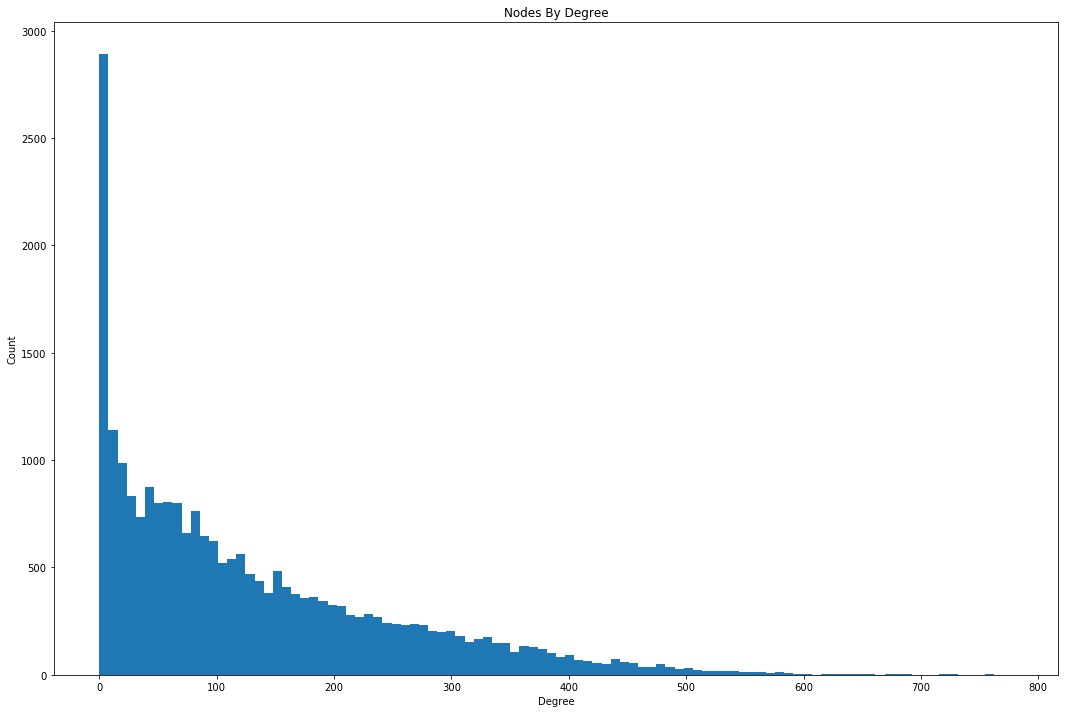

In [79]:
deg_list = list(G.degree(G.nodes()).values())

fig, ax = plt.subplots(figsize=(18, 12))
plt.title('Nodes By Degree')
plt.ylabel('Count')
plt.xlabel('Degree')
plt.hist(deg_list, bins=100)
plt.show()

In [81]:
import operator
max(G.degree(G.nodes()).items(), key=operator.itemgetter(1))[0]

680

In [125]:
# Generate connected components and select the largest:
largest_component = max(nx.connected_components(G), key=len)

# Create a subgraph of G consisting only of this component:
connected = G.subgraph(largest_component)

In [133]:
%%time
path_lengths = nx.shortest_path_length(connected, 680)

Wall time: 342 ms


In [141]:
pdf = pd.DataFrame(pd.Series(path_lengths), columns=['path_length'])
pdf.sort_values('path_length', ascending=False).head()

,path_length
546230,8
724817,7
558069,7
718099,7
272364,7


In [142]:
find_linkage(G,680, 546230)

Finding link from Pulp Fiction to Paskal

Link from Pulp Fiction to In a Valley of Violence is John Travolta
Link from In a Valley of Violence to Stuber is Karen Gillan
Link from Stuber to Headshot is Iko Uwais
Link from Headshot to Antoo Fighter is Bront Palarae
Link from Antoo Fighter to Balada Pencinta is Bell Ngasri
Link from Balada Pencinta to Ngorat is Iedil Putra
Link from Ngorat to Operasi X is Aaron Aziz
Link from Operasi X to Paskal is Hairul Azreen


In [144]:
%%time
#all_data = nx.eccentricity(connected)
# This takes like 2+ hours on my relatively beefy machine, so don't try to rerun it if you don't have to

Wall time: 2h 12min 6s


In [150]:
t = pd.DataFrame(pd.Series(all_data), columns=['max_link'])
t.sort_values('max_link', ascending=False).head(10)

,max_link
718099,13
546230,13
717917,12
272364,12
720039,12
387844,12
26302,12
724817,12
558069,12
527746,11


In [156]:
movie_df[movie_df.id == 718099]

,adult,id,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget
6001,False,718099.0,6.231,Kishmish,NaN,2020-10-22,0.0,0.0,0.0,0.0


In [153]:
movie_df[movie_df.id == 546230]

,adult,id,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget
892,False,546230.0,54.275,Paskal,NaN,2018-09-27,0.0,7.6,46.0,0.0


In [152]:
path_lengths = nx.shortest_path_length(connected, 718099)
pdf = pd.DataFrame(pd.Series(path_lengths), columns=['path_length'])
pdf.sort_values('path_length', ascending=False).head()

,path_length
546230,13
272364,12
387844,12
558069,12
724817,12


In [159]:
pdf.path_length.median()

8.0

In [154]:
find_linkage(G,718099, 546230)

Finding link from Kishmish to Paskal

Link from Kishmish to Tonic is Dev
Link from Tonic to Maya Kumari is Rajatabha Dutta
Link from Maya Kumari to Bela Shuru is Rituparna Sengupta
Link from Bela Shuru to   is Soumitra Chatterjee
Link from   to Mississippi Masala is Sharmila Tagore
Link from Mississippi Masala to Mimic is Charles S. Dutton
Link from Mimic to Stuber is Mira Sorvino
Link from Stuber to Headshot is Iko Uwais
Link from Headshot to Antoo Fighter is Bront Palarae
Link from Antoo Fighter to Balada Pencinta is Bell Ngasri
Link from Balada Pencinta to Ngorat is Iedil Putra
Link from Ngorat to Operasi X is Aaron Aziz
Link from Operasi X to Paskal is Hairul Azreen


# Example Visualization, Will need to be improved for path analysis

In [26]:
movie_subset = movie_df[movie_df.original_title.str.contains('Star Wars')]

movie_nodes = list(movie_subset.id)
label_dict = pd.Series(movie_subset.original_title.values,index=movie_nodes).to_dict()
mG = G.subgraph(movie_nodes)

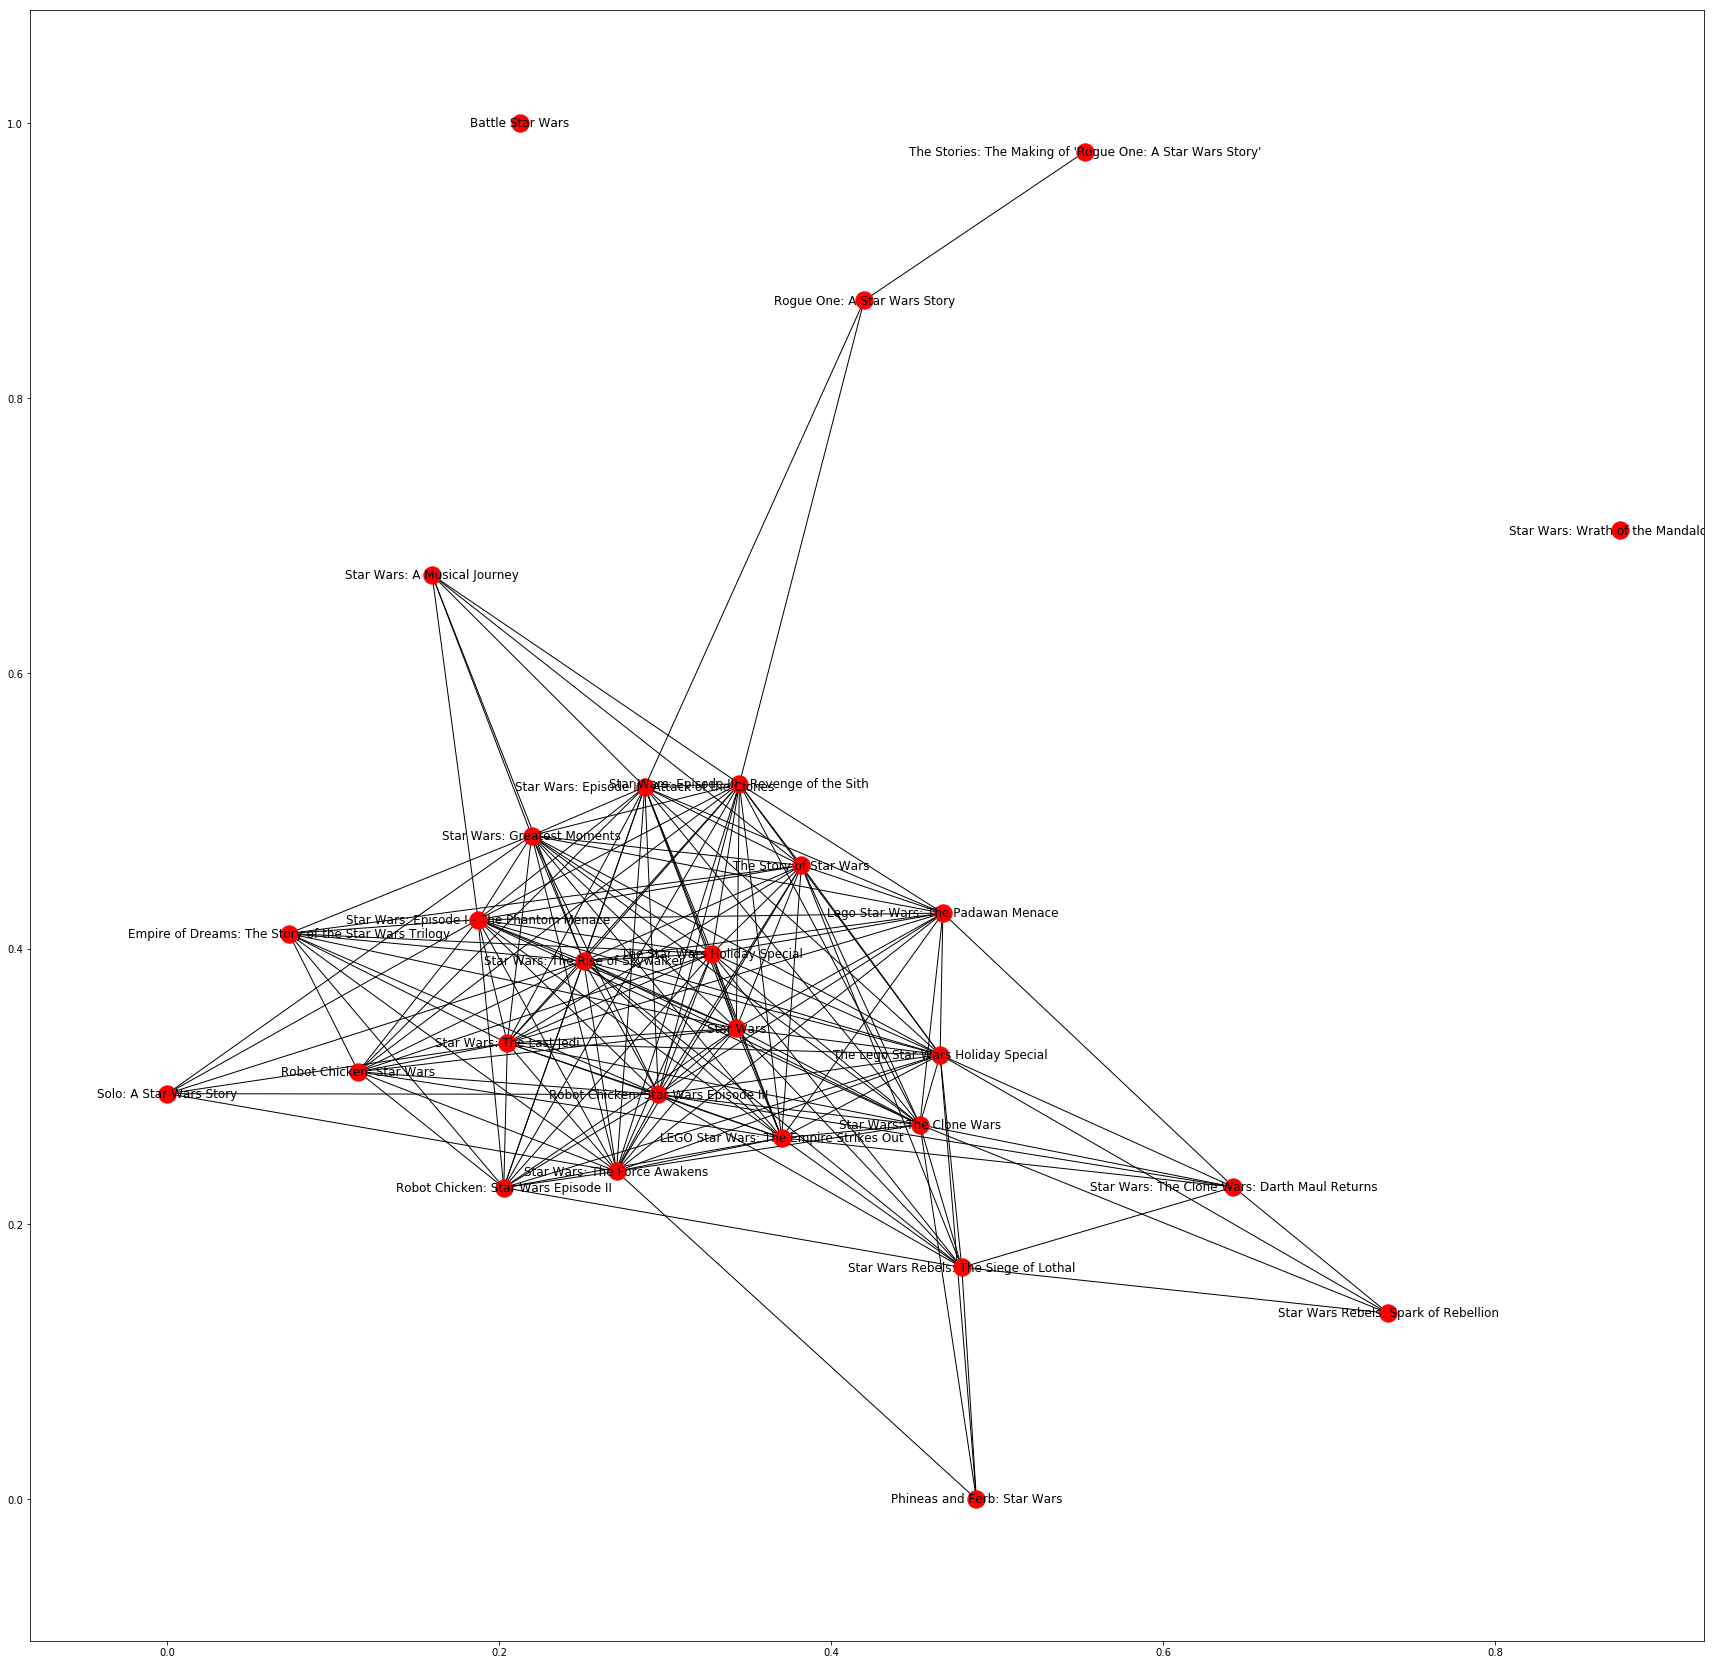

In [27]:
fig, ax = plt.subplots(figsize=(30, 30))

nx.draw_networkx(mG, ax=ax, labels=label_dict)
#nx.draw_circular(mG, ax=ax, labels=label_dict)

In [28]:
# Graph at distance 2 from some John Wick let's say
#movie_df[movie_df.original_title.str.contains('John Wick')]
path = nx.single_source_shortest_path_length(G ,source=2039,cutoff=1)
path[2039] = 0

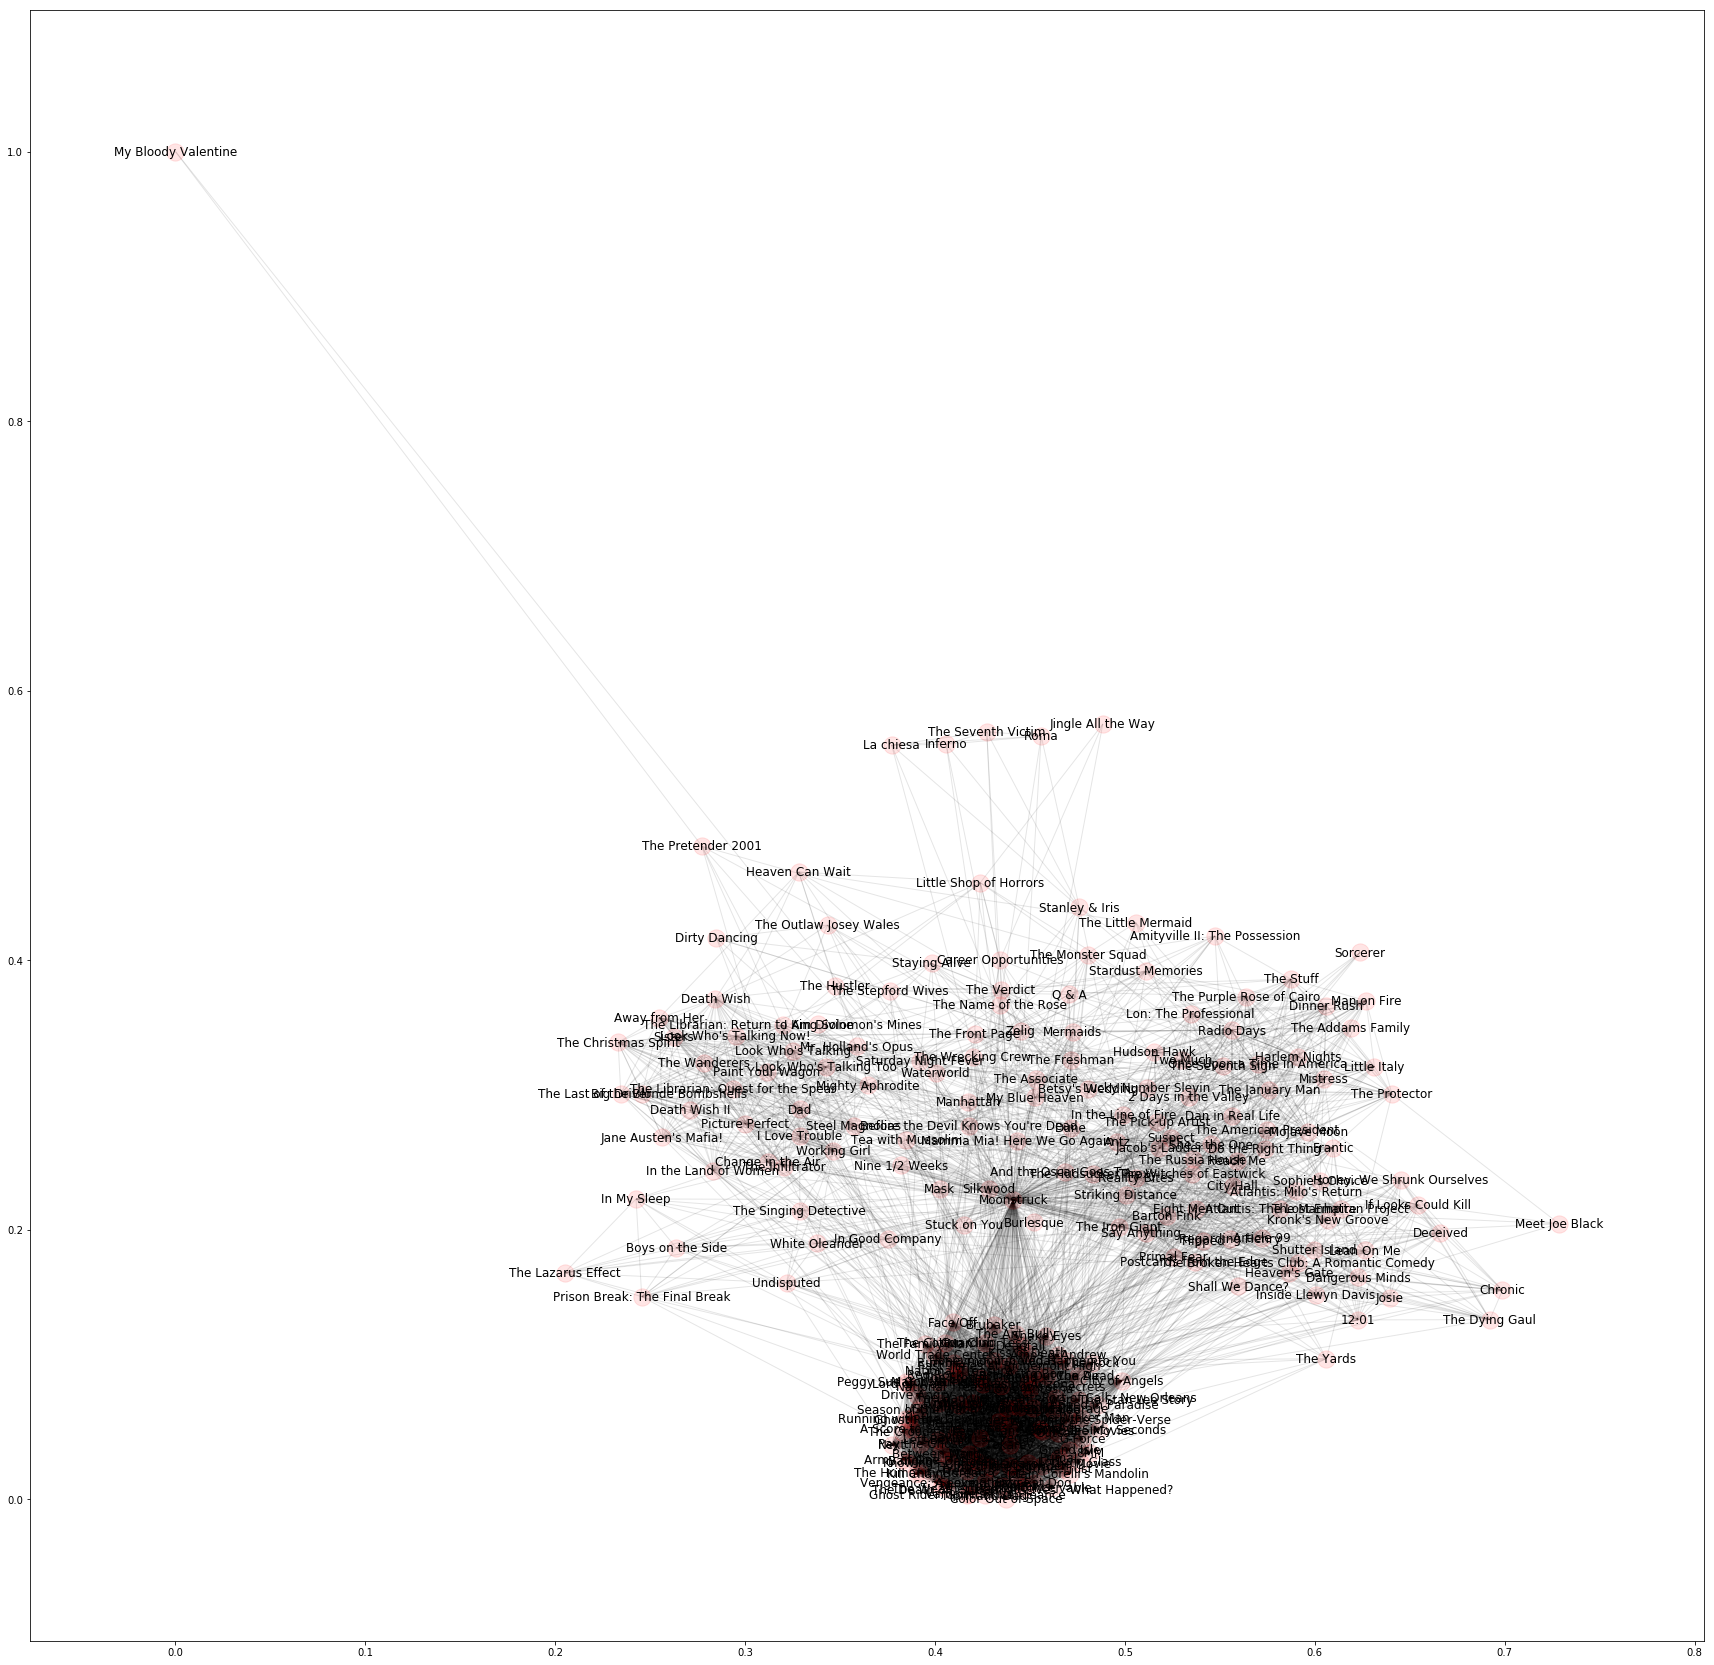

In [29]:
fig, ax = plt.subplots(figsize=(30, 30))

# I don't think this label dict is in correct order is tyhe problem

id_list = list(path.keys())

label_dict = pd.Series(movie_df.set_index('id').loc[id_list].original_title.values,index=id_list).to_dict()

len_G = G.subgraph(list(path.keys()))

pos=nx.spring_layout(len_G)

nx.draw_networkx(len_G, pos=pos, ax=ax, labels=label_dict, alpha=0.10)

# Visualizing Nick Cage Movies

100%|████████████████████████████████████████████████████████████████████████████| 1259/1259 [00:00<00:00, 1865.19it/s]


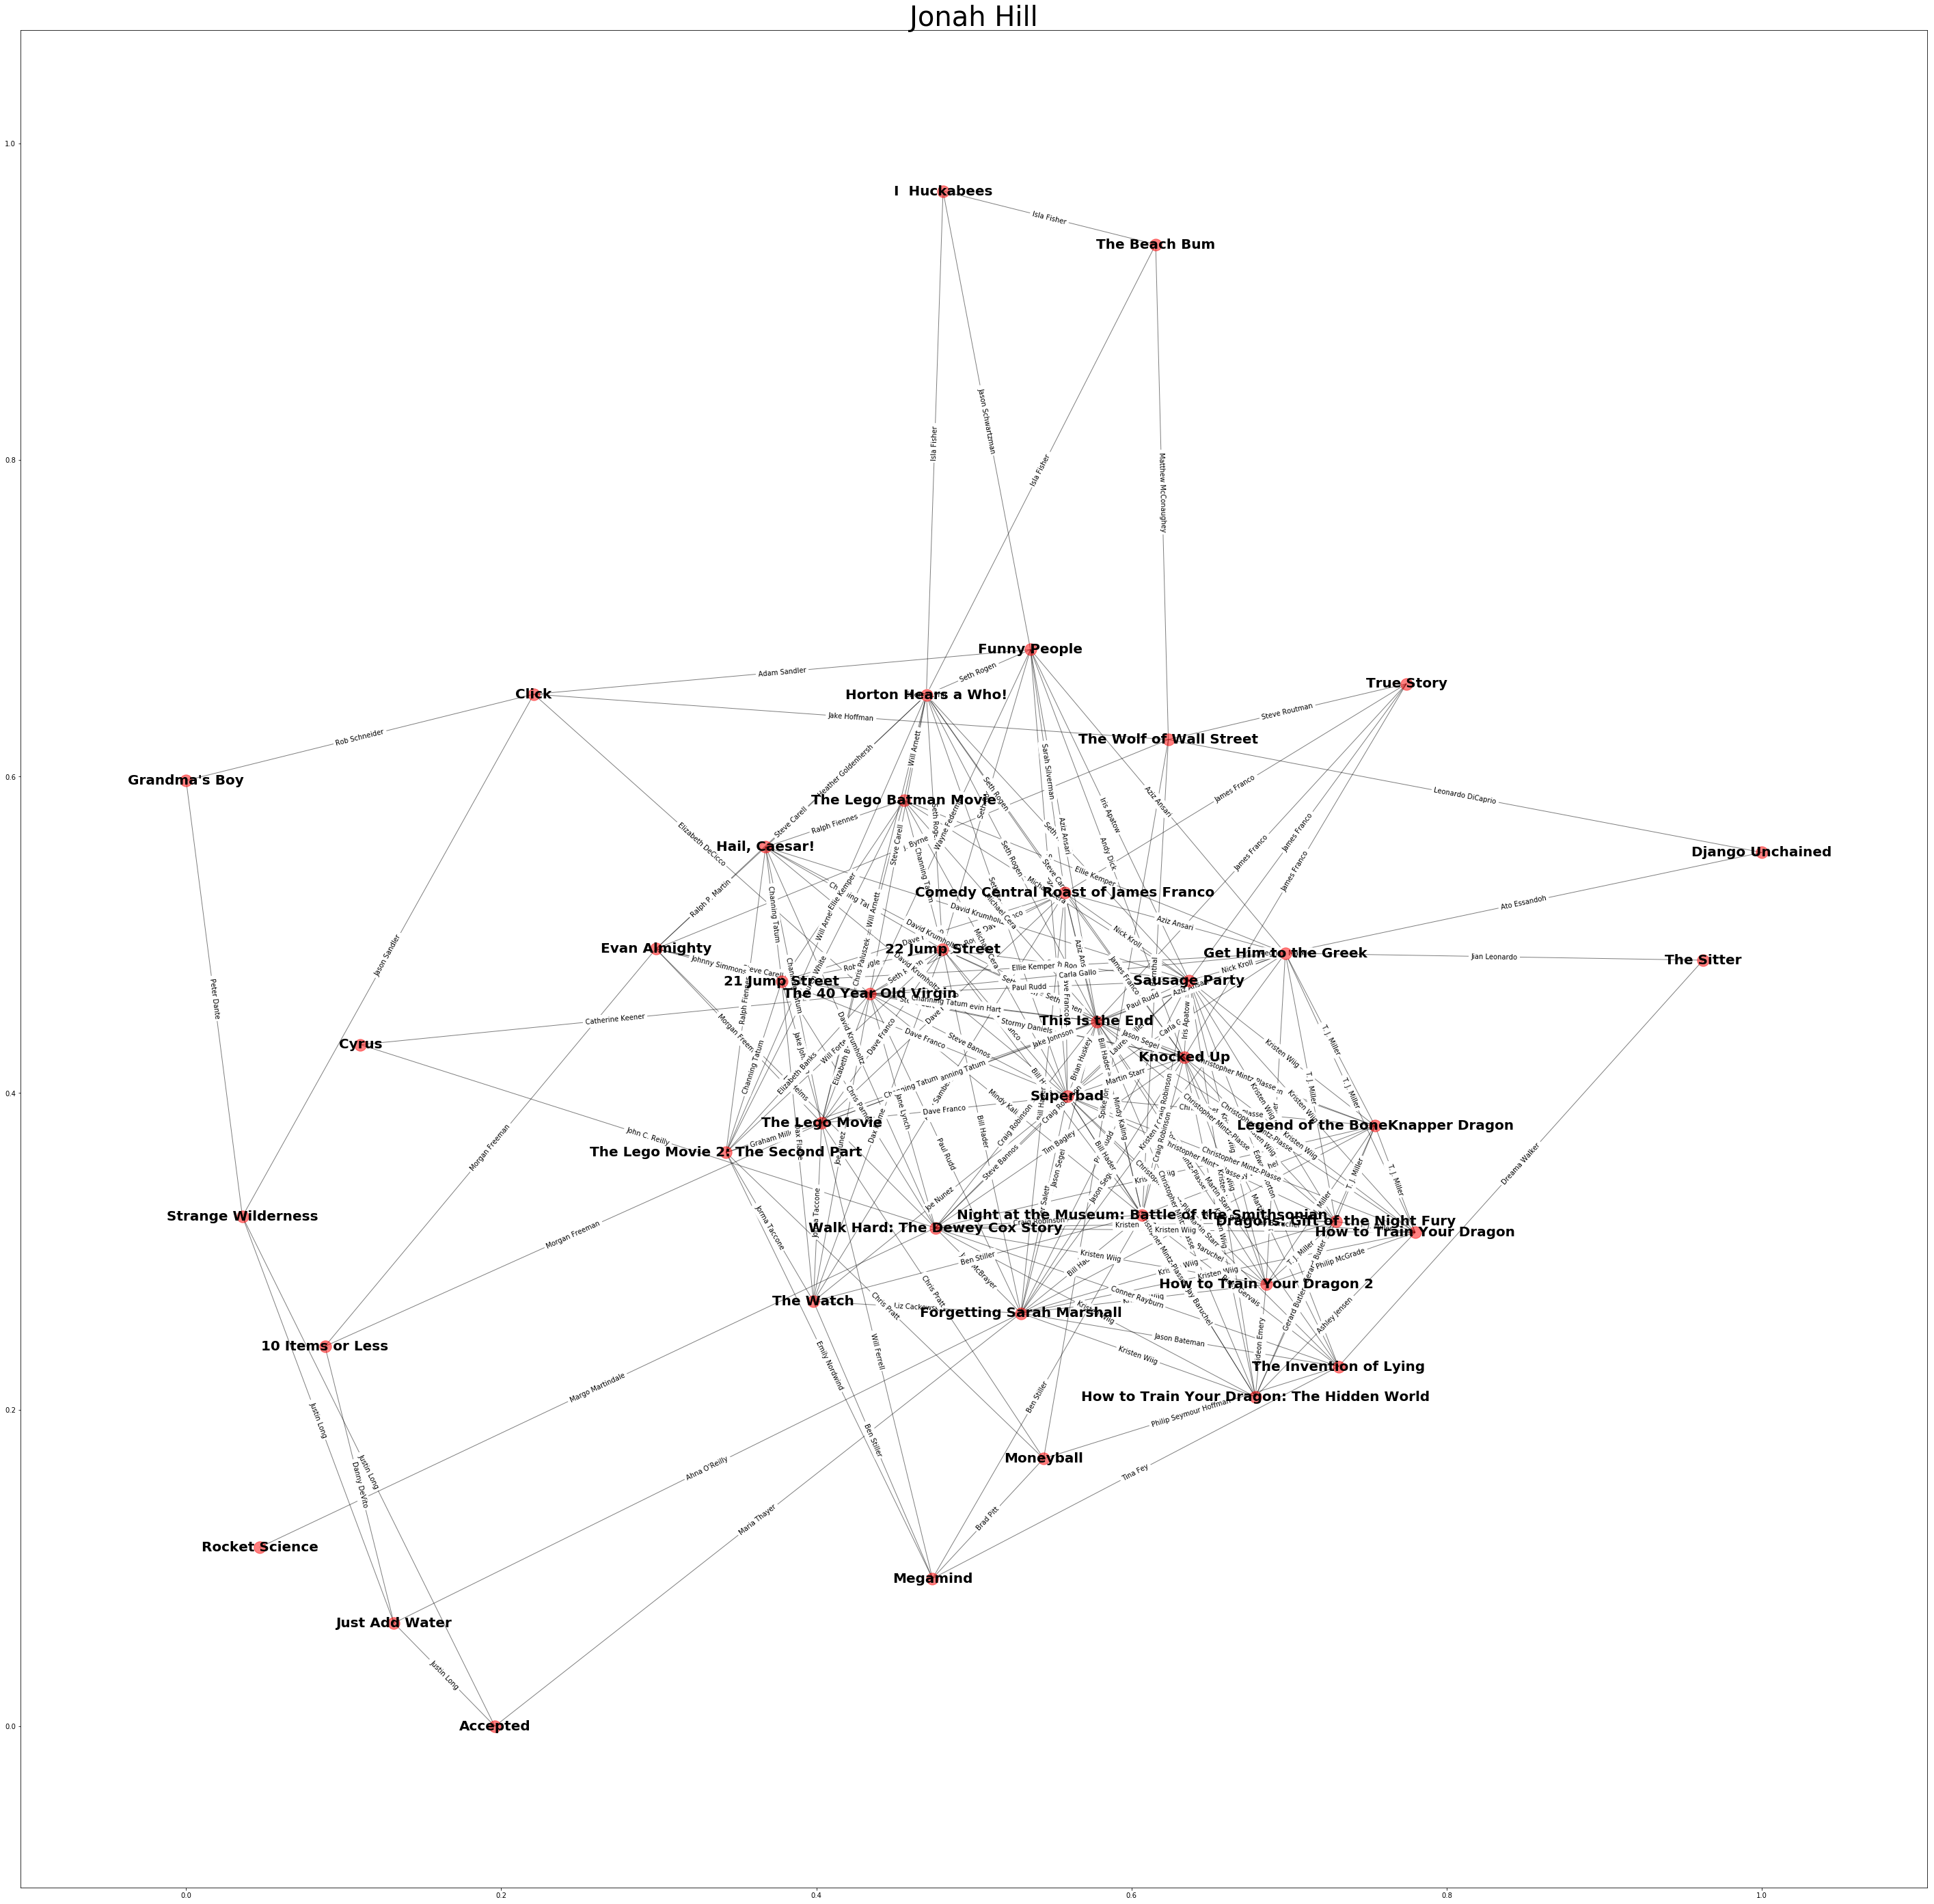

In [170]:
# Oh so I'll need a thing which generates the entire graph but skips records with cast id = whatever

actor = "Jonah Hill"

t = cast_df[~cast_df.name.isnull()]
cage_ids = list(t[t.name.str.contains(actor)].m_id.unique())
cage_actor_id = list(t[t.name.str.contains(actor)].id.unique())[0]



###
##Next Section
###

# Only get cast members who were in a nicholas cage movie
cast_lim = cast_df[cast_df.order < 50]
cast_lim = cast_lim[cast_lim.m_id.isin(cage_ids)]

# So there's some extra ids in here I want to REMOVE cause they're not in the node_list
# list(combinations(list(cast_lim[cast_lim.id == 2].m_id), 2))
cast_edges = []
cast_property = []


for cast_member in tqdm.tqdm(cast_lim.id.unique()):
    if cast_member == cage_actor_id:
        pass
    else:
        tmp_edg_list = list(combinations(list(cast_lim[cast_lim.id == cast_member].m_id), 2))
        cast_edges.extend(tmp_edg_list)
        cast_property.extend([cast_member] * len(tmp_edg_list))

cage_G = nx.Graph()

node_list = cage_ids
cage_G.add_nodes_from(node_list)
#cage_G.add_edges_from(cast_edges)

# Add property
for x in list(zip(cast_edges, cast_property)):
    cage_G.add_edges_from([x[0]], label=x[1])
    
    
###
# Next Section
### 


fig, ax = plt.subplots(figsize=(50, 50))

'''cage_graph = G.subgraph(cage_ids)
cage_G = G.subgraph(cage_ids)'''

# Generate connected components and select the largest:
largest_component = max(nx.connected_components(cage_G), key=len)

# Create a subgraph of G consisting only of this component:
cage_G = cage_G.subgraph(largest_component)

edge_labels = {}
for x in cage_G.edges():
    edge_labels[(x[0], x[1])] = cast_dict[cage_G.get_edge_data(x[0], x[1])['label']]
    edge_labels[(x[1], x[0])] = cast_dict[cage_G.get_edge_data(x[0], x[1])['label']]

label_dict = pd.Series(movie_df.set_index('id').loc[cage_G.nodes()].original_title.values,index=cage_G.nodes()).to_dict()
pos=nx.spring_layout(cage_G, k=1 / np.sqrt(len(cage_G.nodes())))

#pos = nx.spectral_layout(cage_G)
#pos = nx.drawing.circular_layout(cage_G)

nx.draw_networkx(cage_G, pos=pos, ax=ax, labels=label_dict, alpha = 0.5, font_size=20, font_weight='bold')
nx.draw_networkx_edge_labels(cage_G, pos=pos, ax=ax, edge_labels=edge_labels)

plt.title(actor, fontsize=40)
plt.show()

In [545]:
500916 in cage_G.nodes()

False

In [552]:
movie_df[movie_df.original_title.str.contains('Love Guru')]

,adult,id,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget


In [ ]:
1 / np.sqrt(len(cage_G.nodes()))

# Page Rank On Undirected Graph

In [181]:
%%time
pr = nx.pagerank(G)

Wall time: 27.8 s


In [182]:
pr_df = pd.DataFrame.from_dict(pr, orient='index')
pr_df.reset_index(inplace=True)
pr_df.columns = ['id', 'value']

In [183]:
movie_df.set_index('id').loc[list(pr_df.sort_values('value', ascending=False).head(10).id)]

,adult,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget
id,,,,,,,,,
76163,False,28.848,The Expendables 2,NaN,2012-08-08,3.149760e+08,6.2,4956.0,100000000.0
77950,False,27.868,Turbo,NaN,2013-07-11,2.825707e+08,6.1,2269.0,135000000.0
16577,False,22.949,Astro Boy,NaN,2009-10-15,1.955107e+07,6.3,1004.0,10000000.0
95,False,30.898,Armageddon,NaN,1998-07-01,5.537996e+08,6.8,5480.0,140000000.0
272,False,41.868,Batman Begins,NaN,2005-06-10,3.742187e+08,7.7,15081.0,150000000.0
39514,False,19.018,RED,NaN,2010-10-13,7.166496e+07,6.7,4929.0,58000000.0
4995,False,16.842,Boogie Nights,NaN,1997-10-07,4.310159e+07,7.6,1964.0,15000000.0
1701,False,20.153,Con Air,NaN,1997-06-05,2.240122e+08,6.7,2664.0,75000000.0
49026,False,47.041,The Dark Knight Rises,NaN,2012-07-16,1.081041e+09,7.7,16790.0,250000000.0


## With Money

In [245]:
#p_dict = pd.Series(np.log10(movie_df.fillna(0).reset_index()['revenue'].values + 1),
#          index=movie_df.fillna(0).reset_index()['id']).to_dict()

p_dict = pd.Series(movie_df.fillna(0).reset_index()['revenue'].values,
          index=movie_df.fillna(0).reset_index()['id']).to_dict()

In [198]:
%%time
pr = nx.pagerank(G, personalization=p_dict)

Wall time: 33.9 s


In [199]:
pr_df = pd.DataFrame.from_dict(pr, orient='index')
pr_df.reset_index(inplace=True)
pr_df.columns = ['id', 'value']

In [210]:
movie_df.set_index('id').loc[list(pr_df.sort_values('value', ascending=False).head(25).id)]

,adult,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget
id,,,,,,,,,
77950,False,27.868,Turbo,NaN,2013-07-11,2.825707e+08,6.1,2269.0,135000000.0
16577,False,22.949,Astro Boy,NaN,2009-10-15,1.955107e+07,6.3,1004.0,10000000.0
95,False,30.898,Armageddon,NaN,1998-07-01,5.537996e+08,6.8,5480.0,140000000.0
76163,False,28.848,The Expendables 2,NaN,2012-08-08,3.149760e+08,6.2,4956.0,100000000.0
272,False,41.868,Batman Begins,NaN,2005-06-10,3.742187e+08,7.7,15081.0,150000000.0
39514,False,19.018,RED,NaN,2010-10-13,7.166496e+07,6.7,4929.0,58000000.0
49026,False,47.041,The Dark Knight Rises,NaN,2012-07-16,1.081041e+09,7.7,16790.0,250000000.0
4995,False,16.842,Boogie Nights,NaN,1997-10-07,4.310159e+07,7.6,1964.0,15000000.0
140300,False,65.626,Kung Fu Panda 3,NaN,2016-01-23,5.211708e+08,6.8,3796.0,145000000.0


In [201]:
movie_df.sort_values('revenue', ascending=False).head(10)

,adult,id,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget
94,False,299534.0,190.267,Avengers: Endgame,NaN,2019-04-24,2.797801e+09,8.3,15396.0,356000000.0
379,False,19995.0,71.518,Avatar,NaN,2009-12-10,2.787965e+09,7.5,22205.0,237000000.0
438,False,597.0,62.007,Titanic,NaN,1997-11-18,2.187464e+09,7.9,17907.0,200000000.0
803,False,140607.0,51.444,Star Wars: The Force Awakens,NaN,2015-12-15,2.068224e+09,7.4,15037.0,245000000.0
83,False,299536.0,215.160,Avengers: Infinity War,NaN,2018-04-25,2.046240e+09,8.3,19964.0,300000000.0
392,False,135397.0,81.906,Jurassic World,NaN,2015-06-06,1.671713e+09,6.6,16115.0,150000000.0
116,False,420818.0,167.410,The Lion King,NaN,2019-07-12,1.656943e+09,7.2,6942.0,260000000.0
320,False,24428.0,86.288,The Avengers,NaN,2012-04-25,1.519558e+09,7.7,23322.0,220000000.0
783,False,168259.0,51.840,Furious 7,NaN,2015-04-01,1.515048e+09,7.3,7853.0,190000000.0
61,False,330457.0,284.335,Frozen II,NaN,2019-11-20,1.450027e+09,7.3,6284.0,150000000.0


# Create Links that only go forward

In [230]:
jobs = list(crew_df.job.value_counts().iloc[0:10].index)
top_df = crew_df[crew_df.job.isin(jobs)]

# Add in movie ids and release dates
cast_dates = pd.merge(top_df, movie_df[['id', 'release_date']], left_on='m_id', right_on='id', suffixes=['','_m'])
cast_dates.sort_values('release_date', ascending=True, inplace=True)
cast_dates = cast_dates[~cast_dates.release_date.isnull()]

# Get the following record
cast_dates['nxt_m'] = cast_dates.groupby(['id'])['m_id'].shift(1)

# Only crew with valid following movies
link_df = cast_dates[~cast_dates.nxt_m.isnull() & (cast_dates.m_id != cast_dates.nxt_m)]

In [236]:
crew_edges = [list(x) for x in link_df[['m_id', 'nxt_m']].values]

In [237]:
%%time
G = nx.Graph()

node_list = list(set(link_df.m_id.astype(int)))
G.add_nodes_from(node_list)
G.add_edges_from(crew_edges)

Wall time: 640 ms


In [238]:
%%time
pr = nx.pagerank(G)

Wall time: 3.53 s


In [239]:
pr_df = pd.DataFrame.from_dict(pr, orient='index')
pr_df.reset_index(inplace=True)
pr_df.columns = ['id', 'value']

In [240]:
movie_df.set_index('id').loc[list(pr_df.sort_values('value', ascending=False).head(10).id)]

,adult,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget
id,,,,,,,,,
2266.0,False,10.345,"Paris, je t'aime",NaN,2006-06-21,4.857367e+06,6.8,481.0,13000000.0
180.0,False,23.247,Minority Report,NaN,2002-06-20,3.583729e+08,7.3,5822.0,102000000.0
1635.0,False,27.063,The Island,NaN,2005-07-21,1.629492e+08,6.7,3805.0,126000000.0
141052.0,False,112.380,Justice League,NaN,2017-11-15,6.579243e+08,6.2,9710.0,300000000.0
2024.0,False,20.222,The Patriot,NaN,2000-06-28,2.152943e+08,7.1,2520.0,110000000.0
106646.0,False,59.717,The Wolf of Wall Street,NaN,2013-12-25,3.920007e+08,8.0,16206.0,100000000.0
135397.0,False,81.906,Jurassic World,NaN,2015-06-06,1.671713e+09,6.6,16115.0,150000000.0
76757.0,False,37.479,Jupiter Ascending,NaN,2015-02-04,1.839877e+08,5.4,5211.0,176000003.0
49026.0,False,47.041,The Dark Knight Rises,NaN,2012-07-16,1.081041e+09,7.7,16790.0,250000000.0


# With Money

In [246]:
%%time
pr = nx.pagerank(G, personalization=p_dict)

Wall time: 4.76 s


In [247]:
pr_df = pd.DataFrame.from_dict(pr, orient='index')
pr_df.reset_index(inplace=True)
pr_df.columns = ['id', 'value']

In [248]:
movie_df.set_index('id').loc[list(pr_df.sort_values('value', ascending=False).head(10).id)]

,adult,popularity,original_title,original_langue,release_date,revenue,vote_average,vote_count,budget
id,,,,,,,,,
19995.0,False,71.518,Avatar,NaN,2009-12-10,2.787965e+09,7.5,22205.0,237000000.0
299534.0,False,190.267,Avengers: Endgame,NaN,2019-04-24,2.797801e+09,8.3,15396.0,356000000.0
135397.0,False,81.906,Jurassic World,NaN,2015-06-06,1.671713e+09,6.6,16115.0,150000000.0
141052.0,False,112.380,Justice League,NaN,2017-11-15,6.579243e+08,6.2,9710.0,300000000.0
351286.0,False,116.099,Jurassic World: Fallen Kingdom,NaN,2018-06-06,1.303460e+09,6.6,8216.0,170000000.0
299536.0,False,215.160,Avengers: Infinity War,NaN,2018-04-25,2.046240e+09,8.3,19964.0,300000000.0
140607.0,False,51.444,Star Wars: The Force Awakens,NaN,2015-12-15,2.068224e+09,7.4,15037.0,245000000.0
49026.0,False,47.041,The Dark Knight Rises,NaN,2012-07-16,1.081041e+09,7.7,16790.0,250000000.0
315635.0,False,103.876,Spider-Man: Homecoming,NaN,2017-07-05,8.801669e+08,7.4,15034.0,175000000.0
